In [1]:
import pandas as pd
df = pd.read_csv("Misc Files/Bike_data_sprint_1.csv")
# print(df)

In [2]:
df['last_update'] = pd.to_datetime(df['last_update'])
smithF = df.loc[df['name'] == 'SMITHFIELD NORTH']#isolate one station
smithF = smithF.groupby('last_update')['available_bikes'].mean().reset_index()#combine all the data collected at the same time and average, not necessary as th value shouldnt change
smithF = smithF.set_index('last_update')



# print(smithF)


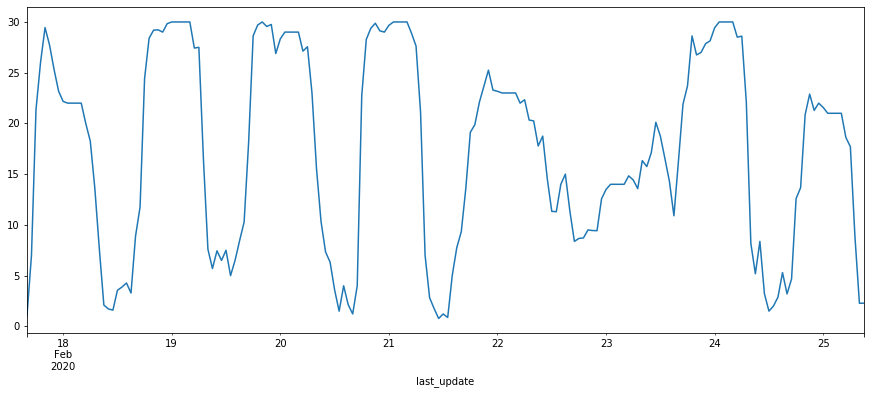

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
y = smithF['available_bikes'].resample('H').mean()#taking the mean value for an hour for plotting purposeses
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
diff = []
hours_in_day = 24
for i in range(hours_in_day, len(y)):
    value = y[i] - y[i-hours_in_day]
    diff.append(value)
    
plt.plot(diff)
plt.show()
#Running the code creates a new seasonally adjusted daily available bikes dataset, 
#skipping the first day of data in order to create the adjustment. 
#The adjusted dataset is then plotted.

In [ ]:
import numpy as np
X = [i%24 for i in range(0, len(y))]
Y = y.values


In [ ]:
degree = 6
coef = np.polyfit(X, Y, degree)
print('Coefficients: %s' % coef)

In [ ]:
# create curve
curve = []
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
plt.plot(y.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

In [ ]:
values = y.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
plt.plot(diff)
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(diff)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(diff, order=(5,0,0))

In [ ]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [4]:
df['last_update'] = pd.to_datetime(df['last_update'])
smithF2 = df.loc[df['name'] == 'SMITHFIELD NORTH']#isolate one station
smithF2 = smithF.groupby('last_update')['available_bikes'].mean().reset_index()#combine all the data collected at the same time and average, not necessary as th value shouldnt change


smithF2['Last_updated_year'] = smithF2['last_update'].dt.year
smithF2['Last_updated_month'] = smithF2['last_update'].dt.month
smithF2['Last_updated_week'] = smithF2['last_update'].dt.week
smithF2['Last_updated_day'] = smithF2['last_update'].dt.day
smithF2['Last_updated_hour'] = smithF2['last_update'].dt.hour
smithF2['Last_updated_minute'] = smithF2['last_update'].dt.minute
smithF2['Last_updated_dayofweek'] = smithF2['last_update'].dt.dayofweek

smithF2.describe().T

,count,mean,std,min,25%,50%,75%,max
available_bikes,1536.0,16.739583,9.767253,0.0,8.0,17.0,26.0,30.0
Last_updated_year,1536.0,2020.000000,0.000000,2020.0,2020.0,2020.0,2020.0,2020.0
Last_updated_month,1536.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Last_updated_week,1536.0,8.185547,0.388867,8.0,8.0,8.0,8.0,9.0
Last_updated_day,1536.0,21.003906,2.274913,17.0,19.0,21.0,23.0,25.0
Last_updated_hour,1536.0,12.071615,6.665782,0.0,7.0,12.0,18.0,23.0
Last_updated_minute,1536.0,29.944010,17.332825,0.0,14.0,29.0,44.0,59.0
Last_updated_dayofweek,1536.0,2.705078,2.016770,0.0,1.0,3.0,4.0,6.0


In [ ]:
smithF2

In [ ]:
smithF3 = smithF2[["available_bikes", "Last_updated_day", 'Last_updated_hour', 'Last_updated_minute']]
pd.plotting.scatter_matrix(smithF3, figsize = (26,26))
# Appears the only feature which has a relationship with the data is Last_updated_hour

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
y = smithF2.available_bikes
# Create X
features = ['Last_updated_day', 'Last_updated_hour', 'Last_updated_minute','Last_updated_dayofweek']
X = smithF2[features]


In [7]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
# Specify Model
rf_model = RandomForestRegressor(random_state=1, max_leaf_nodes = None)
# Fit Model
rf_model.fit(train_X, train_y)

In [ ]:
# Make validation predictions and calculate mean absolute error
val_predictions = rf_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

In [ ]:
# rf_model.predict([[18,13,30,1]])
avail_bikes = []
for i in range(24):
    avail_bikes.append(rf_model.predict([[18,i,30,1]])[0])

In [ ]:
plt.plot(range(24), avail_bikes)

In [ ]:
rf_model.predict([[5,9,0,3]])

In [ ]:
from datetime import datetime
time = "2020-03-05 07:00:00"
time2 = datetime.strptime(time, '%Y-%m-%d  %H:%M:%S')

print(f"Expected number of bikes at {time} is {rf_model.predict([[time2.day, time2.hour, time2.minute, time2.weekday()]])[0]}")

In [10]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import sklearn.metrics
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [25]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, shuffle=False)

In [26]:
scaler = StandardScaler()#We also ran this with the MinMax Scaler but found it did not work as well 
scaler.fit(train_X)
X_train_scaled = scaler.transform(train_X)
X_test_scaled = scaler.transform(val_X)

In [ ]:
sol=['lbfgs', 'sgd', 'adam']
for i in sol:
    mlp = MLPRegressor(solver=i, activation='tanh', alpha=0.0001,
                    random_state=16,hidden_layer_sizes=[10,10],tol=0.0000000001,learning_rate='constant').fit(X_train_scaled, train_y)
    print("Neurons: [{:d},{:d}], ".format(10,10) + 'tanh' + ", alpha = " + np.str(0.0001))
    print("Sol",i)
    y_hat = mlp.predict(X_test_scaled)
    y_hat2 = mlp.predict(X_train_scaled)
    print("Test R2 score", sklearn.metrics.r2_score(val_y, y_hat))
    print("Training R2 score", sklearn.metrics.r2_score(train_y, y_hat2))
    print("Test RMSE score", (sklearn.metrics.mean_squared_error(val_y, y_hat))**0.5)
    print("Training RMSE score", (sklearn.metrics.mean_squared_error(train_y, y_hat2))**0.5)
    print("Test RAE score", sklearn.metrics.mean_absolute_error(val_y, y_hat))
    print("Training RAE score", sklearn.metrics.mean_absolute_error(train_y, y_hat2))
    print("="*15)
    
#sgd is the best solver

In [ ]:
act = ['identity', 'logistic', 'tanh', 'relu']

for a in act:
    mlp = MLPRegressor(solver='sgd', activation=a, alpha=0.0001,
                    random_state=16,hidden_layer_sizes=[100,100,100],
                    tol=0.0000000001,
                    max_iter=10000000,
                    learning_rate='constant').fit(X_train_scaled, train_y)
    print(a)
    y_hat = mlp.predict(X_test_scaled)
    y_hat2 = mlp.predict(X_train_scaled)
    print("Test R2 score", sklearn.metrics.r2_score(val_y, y_hat))
    print("Training R2 score", sklearn.metrics.r2_score(train_y, y_hat2))
    print("Test RMSE score", (sklearn.metrics.mean_squared_error(val_y, y_hat))**0.5)
    print("Training RMSE score", (sklearn.metrics.mean_squared_error(train_y, y_hat2))**0.5)
    print("Test RAE score", sklearn.metrics.mean_absolute_error(val_y, y_hat))
    print("Training RAE score", sklearn.metrics.mean_absolute_error(train_y, y_hat2))

    


In [27]:
from random import choices
data = 10, 50, 100, 150, 5
hidden_layers = sorted((choices(data, k=3)) for i in range(20))

In [29]:
min_rmse = 10
for tuplle in hidden_layers: 
    mlp = MLPRegressor(solver='sgd', activation="tanh", alpha=0.0001,
                    random_state=16,hidden_layer_sizes=tuplle,
                    tol=0.0000000001,
                    max_iter=10000000,
                    learning_rate='constant').fit(X_train_scaled, train_y)
    y_hat = mlp.predict(X_test_scaled)
    rmse = ((sklearn.metrics.mean_squared_error(val_y, y_hat))**0.5)
    print(tuplle)
    if  rmse < min_rmse:
        print("Test R2 score", sklearn.metrics.r2_score(val_y, y_hat))
        print("Test RMSE score", (sklearn.metrics.mean_squared_error(val_y, y_hat))**0.5)
        print("Test RAE score", sklearn.metrics.mean_absolute_error(val_y, y_hat))
        print("="*25)
        min_rmse = rmse

[5, 5, 5]
Test R2 score 0.17806834389751225
Test RMSE score 8.709372051632075
Test RAE score 6.451645589031654
[5, 5, 50]
Test R2 score 0.24318850002106018
Test RMSE score 8.357239553763787
Test RAE score 6.497148041179737
[5, 10, 100]
[5, 50, 100]
[5, 150, 5]
[10, 50, 10]
[10, 50, 100]
[10, 50, 150]
[10, 100, 10]
[10, 100, 150]
[50, 10, 10]
[50, 50, 10]
[50, 100, 50]
[100, 5, 50]
[100, 5, 100]
Test R2 score 0.2695943698679556
Test RMSE score 8.210149130899692
Test RAE score 6.2966636337126145
[150, 5, 5]
[150, 10, 10]
[150, 50, 50]
[150, 100, 10]
[150, 150, 100]


In [30]:
mlp = MLPRegressor(solver='sgd', activation='tanh', alpha=0.0001,
                random_state=16,hidden_layer_sizes=[100,50,100],
                tol=0.0000000001,
                max_iter=10000000,
                learning_rate='constant').fit(X_train_scaled, train_y)
y_hat = mlp.predict(X_test_scaled)
y_hat2 = mlp.predict(X_train_scaled)
print("Test R2 score", sklearn.metrics.r2_score(val_y, y_hat))
print("Training R2 score", sklearn.metrics.r2_score(train_y, y_hat2))
print("Test RMSE score", (sklearn.metrics.mean_squared_error(val_y, y_hat))**0.5)
print("Training RMSE score", (sklearn.metrics.mean_squared_error(train_y, y_hat2))**0.5)
print("Test RAE score", sklearn.metrics.mean_absolute_error(val_y, y_hat))
print("Training RAE score", sklearn.metrics.mean_absolute_error(train_y, y_hat2))

    


Test R2 score -0.32362955160631324
Training R2 score 0.9842228286256042
Test RMSE score 11.052288607482376
Training RMSE score 1.2325834111066942
Test RAE score 7.860034630717994
Training RAE score 0.9333586029763725


In [32]:
from datetime import datetime
time = "2020-02-25 09:00:00"
time2 = datetime.strptime(time, '%Y-%m-%d  %H:%M:%S')

ex_bikes = mlp.predict(scaler.transform([[time2.day, time2.hour, time2.minute, time2.weekday()]]))[0]
print(f"Expected number of bikes at {time} is {ex_bikes}")

Expected number of bikes at 2020-02-25 09:00:00 is 8.6902151138611
